In [1]:
# This code will train a 2-layer neural network to predict a beer's ABV given the Brewer's Friend dataset
# NN architecture consists of two layers of 12 neurons each (e.g. 1 hidden layer), expecting a length-12 input vector
# Training occurs over 100 epochs using the Keras interface for TensorFlow

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import operator
import functools

Using TensorFlow backend.


In [2]:
# Data setup
data = pd.read_csv("data/numerical_recipe_data_processed.csv")
# Standardize data by subtracting the mean and dividing by the standard deviation
mean = data.mean(axis=0)
sdev = data.std(axis=0)
data = (data - mean) / sdev
# Separate predictors from responses
x_headers = list(x for x in data.columns if x != "ABV")
print("Predictors are: ", ", ".join(x_headers))
y_headers= ["ABV"]
x_vals = data[x_headers]
y_vals = data[y_headers]

# Random seed for reproducibility
seed = 1234
np.random.seed(seed)

Predictors are:  Size, OG, FG, Color, BoilSize, BoilTime, BoilGravity, Efficiency, MashThickness, PitchRate, PrimaryTemp, IBU


In [3]:
# Neural Network
nnet = keras.models.Sequential()
# First layer
nnet.add(keras.layers.Dense(units = 12, # 12 neurons in the layer
                                  input_dim = 12, # 12 inputs to the layer
                                  activation = "relu", # Activation function; choosing a rectified linear unit
                                  kernel_initializer = "normal", # Initialize weights from normal distribution
                                  bias_initializer = "normal" # Same for bias vector
                                 )
              )
# Hidden Layer
nnet.add(keras.layers.Dense(units = 12,
                           activation = "relu",
                           kernel_initializer = "normal",
                           bias_initializer = "normal")
        )
# Output Layer
nnet.add(keras.layers.Dense(units = 1,
                                 kernel_initializer = "normal"))
# Generate the graph
nnet.compile(loss = 'mean_squared_error', # Loss function for the model
                   optimizer = 'sgd', # Stochastic Gradient Descent
                   metrics = ['mse', 'mae'] # Error metrics we want to monitor while the model is trained
                  )
# Train the network
numEpochs = 100
history = nnet.fit(x_vals, # Training data
                         y_vals, # Labels
                         epochs = numEpochs, # How many times to iterate over the data; we have >40k test cases
                         validation_split = 0.2, # Peel off 20% of the training set for validation
                         verbose = 0
                        )


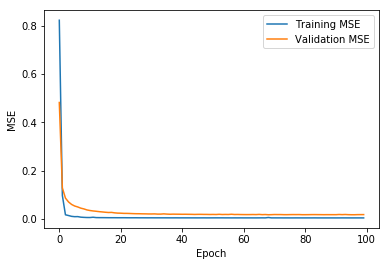

In [4]:
plt.figure()
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.plot(history.epoch,
         np.array(history.history['mean_squared_error']),
         label = "Training MSE"
        )
plt.plot(history.epoch,
        np.array(history.history['val_mean_squared_error']),
        label = "Validation MSE"
        )
plt.legend()
plt.show()
plt.close()

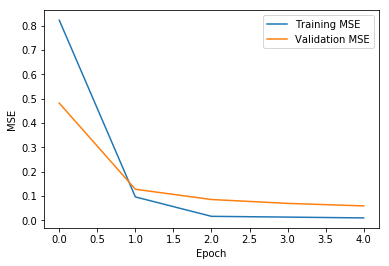

In [5]:
# Zoom in to the first few epochs
plt.figure()
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.plot(history.epoch[0:5],
         np.array(history.history['mean_squared_error'])[0:5],
         label = "Training MSE"
        )
plt.plot(history.epoch[0:5],
        np.array(history.history['val_mean_squared_error'])[0:5],
        label = "Validation MSE"
        )
plt.legend()
plt.show()

In [6]:
# Pull random test cases
numSamples = 50
eval_set = data.sample(numSamples)
x_eval = eval_set[x_headers]
y_eval = eval_set[y_headers]
pd.options.mode.chained_assignment = None # Disable chained assignment warning; we know we're working on a copy here
y_eval["Predicted"] = nnet.predict(x_eval)
# Return data to original scale
mean_y = mean["ABV"]
sdev_y = sdev["ABV"]
for col in y_eval:
    y_eval[col] *= mean_y
    y_eval[col] += sdev_y
# Calculate Error
y_eval["Error"] = y_eval["ABV"] - y_eval["Predicted"]
print(y_eval)

             ABV  Predicted     Error
15702   1.741408   1.601778  0.139630
4066    5.510766   5.847079 -0.336313
242     9.107218   9.082861  0.024357
5307    2.675102   2.983029 -0.307927
17713  -2.684995  -2.758548  0.073553
417    18.513323  15.058155  3.455168
13667   4.922884   4.812235  0.110649
6591    2.778846   2.982087 -0.203241
14339  -1.059675  -0.605152 -0.454523
3394    4.196678   3.906978  0.289700
18061   2.951752   2.670512  0.281240
2375   27.089477  27.077427  0.012050
4921   10.628794  10.786824 -0.158031
8499    0.600226   0.763300 -0.163074
18587  -3.653270  -3.311375 -0.341895
2532    9.902587   8.067732  1.834855
1460   -2.339182  -2.434602  0.095420
1697    5.718253   5.761174 -0.042921
9591    8.381011   8.592234 -0.211223
7556   -2.996226  -2.859939 -0.136287
18969  -1.716719  -1.672818 -0.043901
6455    4.369584   4.364767  0.004817
18668  -4.137408  -4.159818  0.022410
2369   -6.004796  -5.599258 -0.405538
1402    2.744264   3.019167 -0.274903
16913 -10.98